In [ ]:

!pip install dataprep
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 71.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
# Importing libraries required
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import dataprep.eda as eda # EDA, Cleaning
from dataprep.eda import create_report

import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization

# Data analysis and ML Library
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso # Lasso regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.svm import SVC # Support vector machine classifier
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier# K Nearset Neighbors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_curve,roc_auc_score

# Handle Imbalanced dataset
from imblearn.over_sampling import SMOTE

# Print html elements
from IPython.display import Markdown

In [ ]:
# Functions

# K-Fold Cross-Validation
# https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,X=_X,y=_y,cv=_cv,scoring=_scoring,return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

# Print confusion matrix heatmap
def print_confusion_matrix(y_true,y_pred):

    cf_matrix = confusion_matrix(y_true,y_pred)

    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_auc_roc_curve(model,X_test,y_test):
    pred_prob = model.predict_proba(X_test)

    # roc curve and auc score for model
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    auc_score = roc_auc_score(y_test, pred_prob[:,1])

    # roc curve for tpr = fpr (AUC = 0.5)
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.rcParams["figure.figsize"] = (5,5)

    ax = plt.subplots()
    ax = sns.lineplot(x=p_fpr, y=p_tpr, color='r')
    ax = sns.lineplot(x=fpr, y=tpr, color='b',linestyle='dashed')
    ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
    plt.text(0.5, -0.17, 'AUC Score : '+ str(round(auc_score,2)) , transform=plt.gca().transAxes, ha='center')
    plt.show()

# Print confusion matrix and performance metrics
def print_model_performance(model_name,model,X_test,y_test):

    display(Markdown("<h2> "+model_name+" </h2>"))
    y_pred = model.predict(X_test)

    display(Markdown("<h3> Classification report : </h3>"))
    print(classification_report(y_test,y_pred))

    display(Markdown("<h3> Confusion matrix : </h3>"))
    print_confusion_matrix(y_test,y_pred)

    display(Markdown("<h3> AUC-ROC Curve : </h3>"))
    plot_auc_roc_curve(model,X_test,y_test)

    display(Markdown("<br/>"))


In [ ]:
company_df = pd.read_csv("/content/data.csv")

In [ ]:
print("Number of Records : ",company_df.shape[0],"\nNumber of Features : ",company_df.shape[1])

Number of Records :  6819 
Number of Features :  96


In [ ]:
company_df.columns = company_df.columns.str.strip()

In [ ]:
company_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
company_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [ ]:
duplicate_rows = company_df.duplicated()
print("Number of duplicated records :",len(company_df[duplicate_rows]))

Number of duplicated records : 0


In [ ]:
# Lets check for the presence of missing values
missing_value_count = pd.DataFrame(company_df.isna().sum())
missing_value_count.columns = ["Count"]
print("Total number of columns with missing values :",len(missing_value_count[missing_value_count.Count > 0]))

Total number of columns with missing values : 0


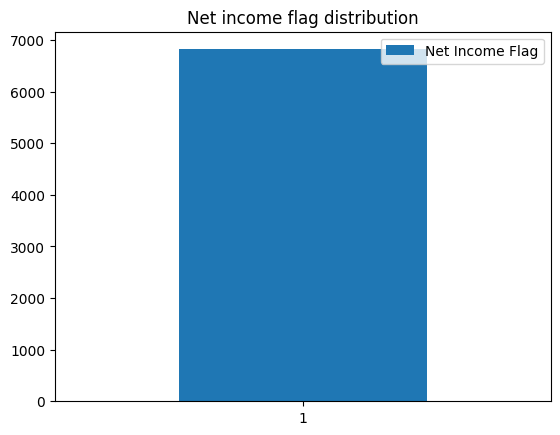

Net Income Flag Distribution

   Net Income Flag
1             6819


In [ ]:
pd.DataFrame(company_df['Net Income Flag'].value_counts()).plot.bar(y='Net Income Flag', rot=0)
plt.title("Net income flag distribution")
plt.show()
print("Net Income Flag Distribution\n")
print(pd.DataFrame(company_df['Net Income Flag'].value_counts()))

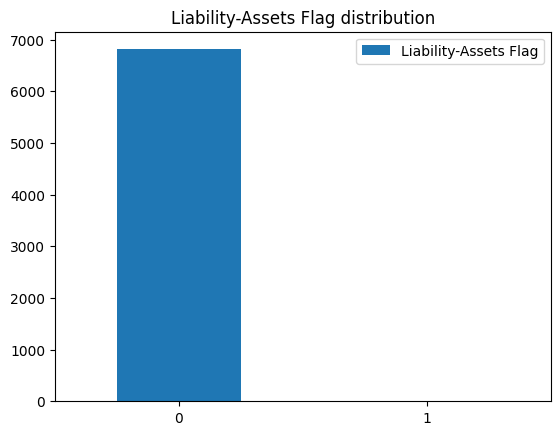

Liability-Assets Flag Distribution

   Liability-Assets Flag
0                   6811
1                      8


In [ ]:
pd.DataFrame(company_df['Liability-Assets Flag'].value_counts()).plot.bar(y='Liability-Assets Flag', rot=0)
plt.title("Liability-Assets Flag distribution")
plt.show()
print("Liability-Assets Flag Distribution\n")
print(pd.DataFrame(company_df['Liability-Assets Flag'].value_counts()))

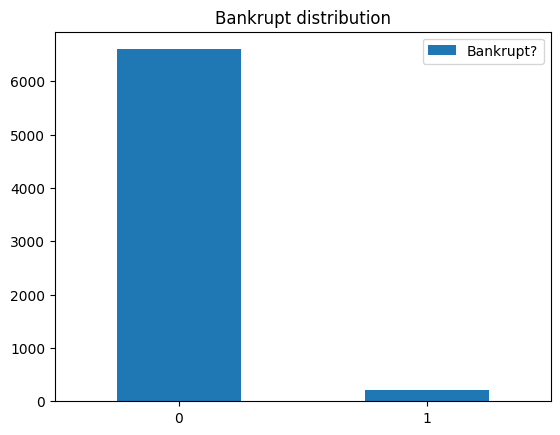

Bankrupt Distribution

   Bankrupt?
0       6599
1        220


In [ ]:
pd.DataFrame(company_df['Bankrupt?'].value_counts()).plot.bar(y='Bankrupt?', rot=0)
plt.title("Bankrupt distribution")
plt.show()
print("Bankrupt Distribution\n")
print(pd.DataFrame(company_df['Bankrupt?'].value_counts()))

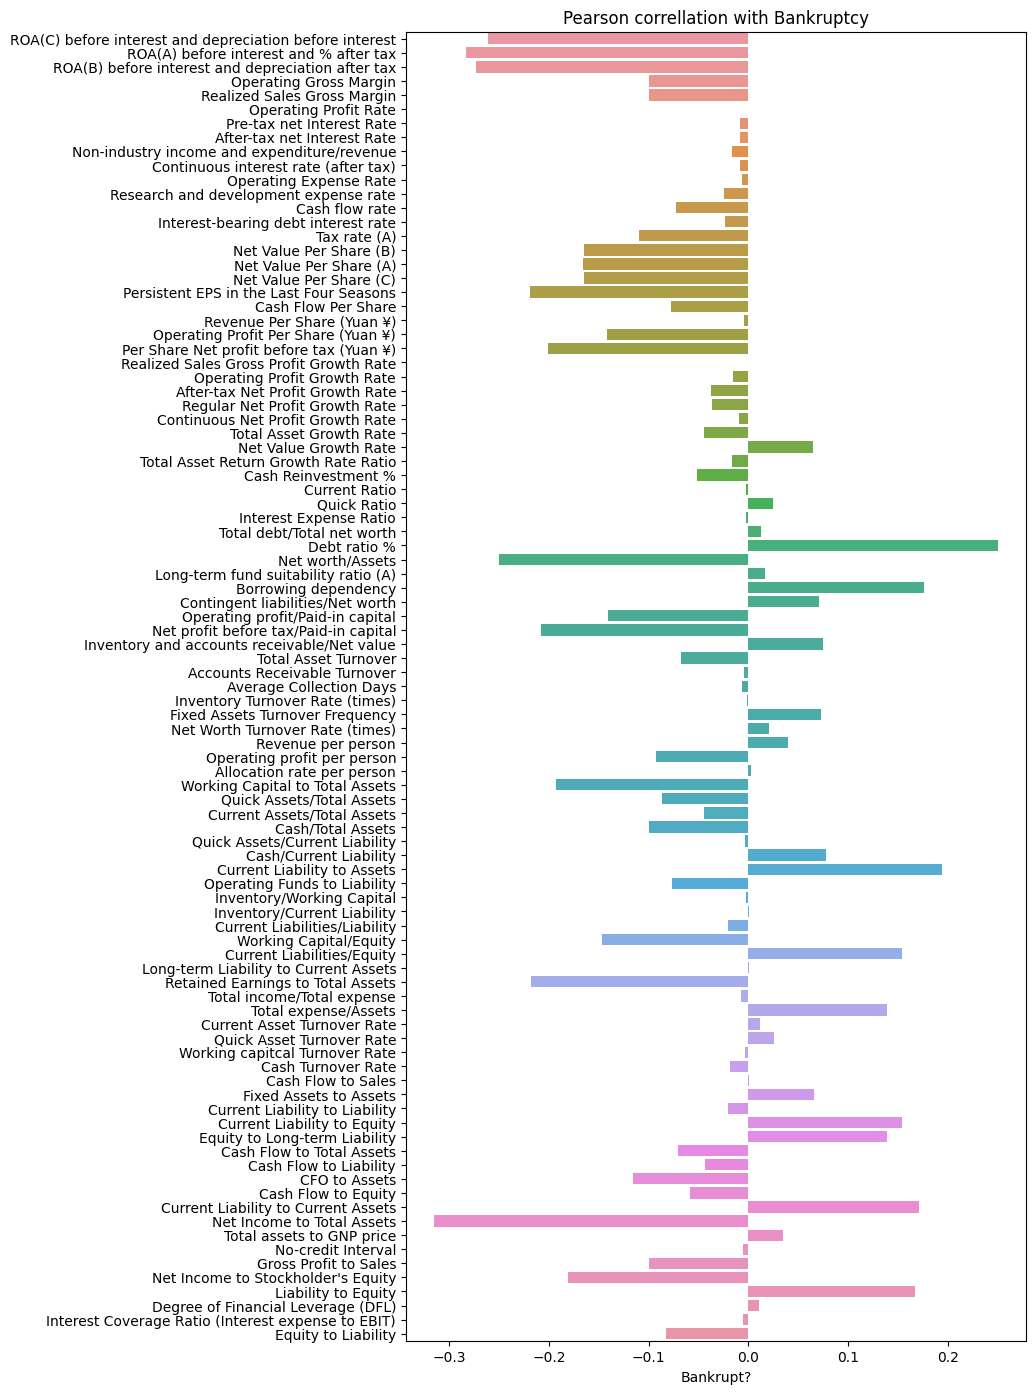

In [ ]:
# Observations on categorical data distribution:

# Net income flag value - Activated for 100% companies, so this column can be removed from EDA and Modelling steps
# Liability assets flag - Activated for 0.1% companies of total dataset
# Bankruptcy flag - This is our target variable, from the distribution we can observe the class imbalance (Needs to be treated before modelling)

# Too many columns to perform EDA
# In the bankruptcy data we have has 90+ columns. Carrying out EDA/Modelling on 90+ columns is a time and resource consuming process.
# The curse of dimensionality is like trying to find a single sock in a mountain of laundry. As the number of dimensions (socks) increases,
#  the chances of finding a match (meaningful patterns) become increasingly elusive and your search turns into a chaotic mess
# Lets narrow down our analysis to limited columns, so we will use pearson correlation to narrow down the number of columns based on linear relationships

# Columns with Linear relationship with Target variable
company_corr = pd.DataFrame(company_df.corr(numeric_only=True))
company_corr = pd.DataFrame(company_corr['Bankrupt?'])

# Remove specific indices, all 3 are categorical
indices_to_remove = ['Liability-Assets Flag', 'Net Income Flag','Bankrupt?']
company_corr = company_corr.drop(indices_to_remove)

plt.figure(figsize=(8, 17))
sns.barplot(y=company_corr.index,x=company_corr['Bankrupt?'])
plt.title("Pearson correllation with Bankruptcy")
plt.show()

In [ ]:
# Lets see what features has weak correlation to strong correlation (>|0.10|)
temp_corr = company_corr
temp_corr[['Bankrupt?']] = abs(temp_corr[['Bankrupt?']])
print("\nColumns with correlation (>|0.10|) :\n")
for i in temp_corr[(temp_corr["Bankrupt?"] > 0.10)].index:
    print("* "+i+"\t")


Columns with correlation (>|0.10|) :

* ROA(C) before interest and depreciation before interest	
* ROA(A) before interest and % after tax	
* ROA(B) before interest and depreciation after tax	
* Operating Gross Margin	
* Tax rate (A)	
* Net Value Per Share (B)	
* Net Value Per Share (A)	
* Net Value Per Share (C)	
* Persistent EPS in the Last Four Seasons	
* Operating Profit Per Share (Yuan ¥)	
* Per Share Net profit before tax (Yuan ¥)	
* Debt ratio %	
* Net worth/Assets	
* Borrowing dependency	
* Operating profit/Paid-in capital	
* Net profit before tax/Paid-in capital	
* Working Capital to Total Assets	
* Cash/Total Assets	
* Current Liability to Assets	
* Working Capital/Equity	
* Current Liabilities/Equity	
* Retained Earnings to Total Assets	
* Total expense/Assets	
* Current Liability to Equity	
* Equity to Long-term Liability	
* CFO to Assets	
* Current Liability to Current Assets	
* Net Income to Total Assets	
* Gross Profit to Sales	
* Net Income to Stockholder's Equity	
* Li

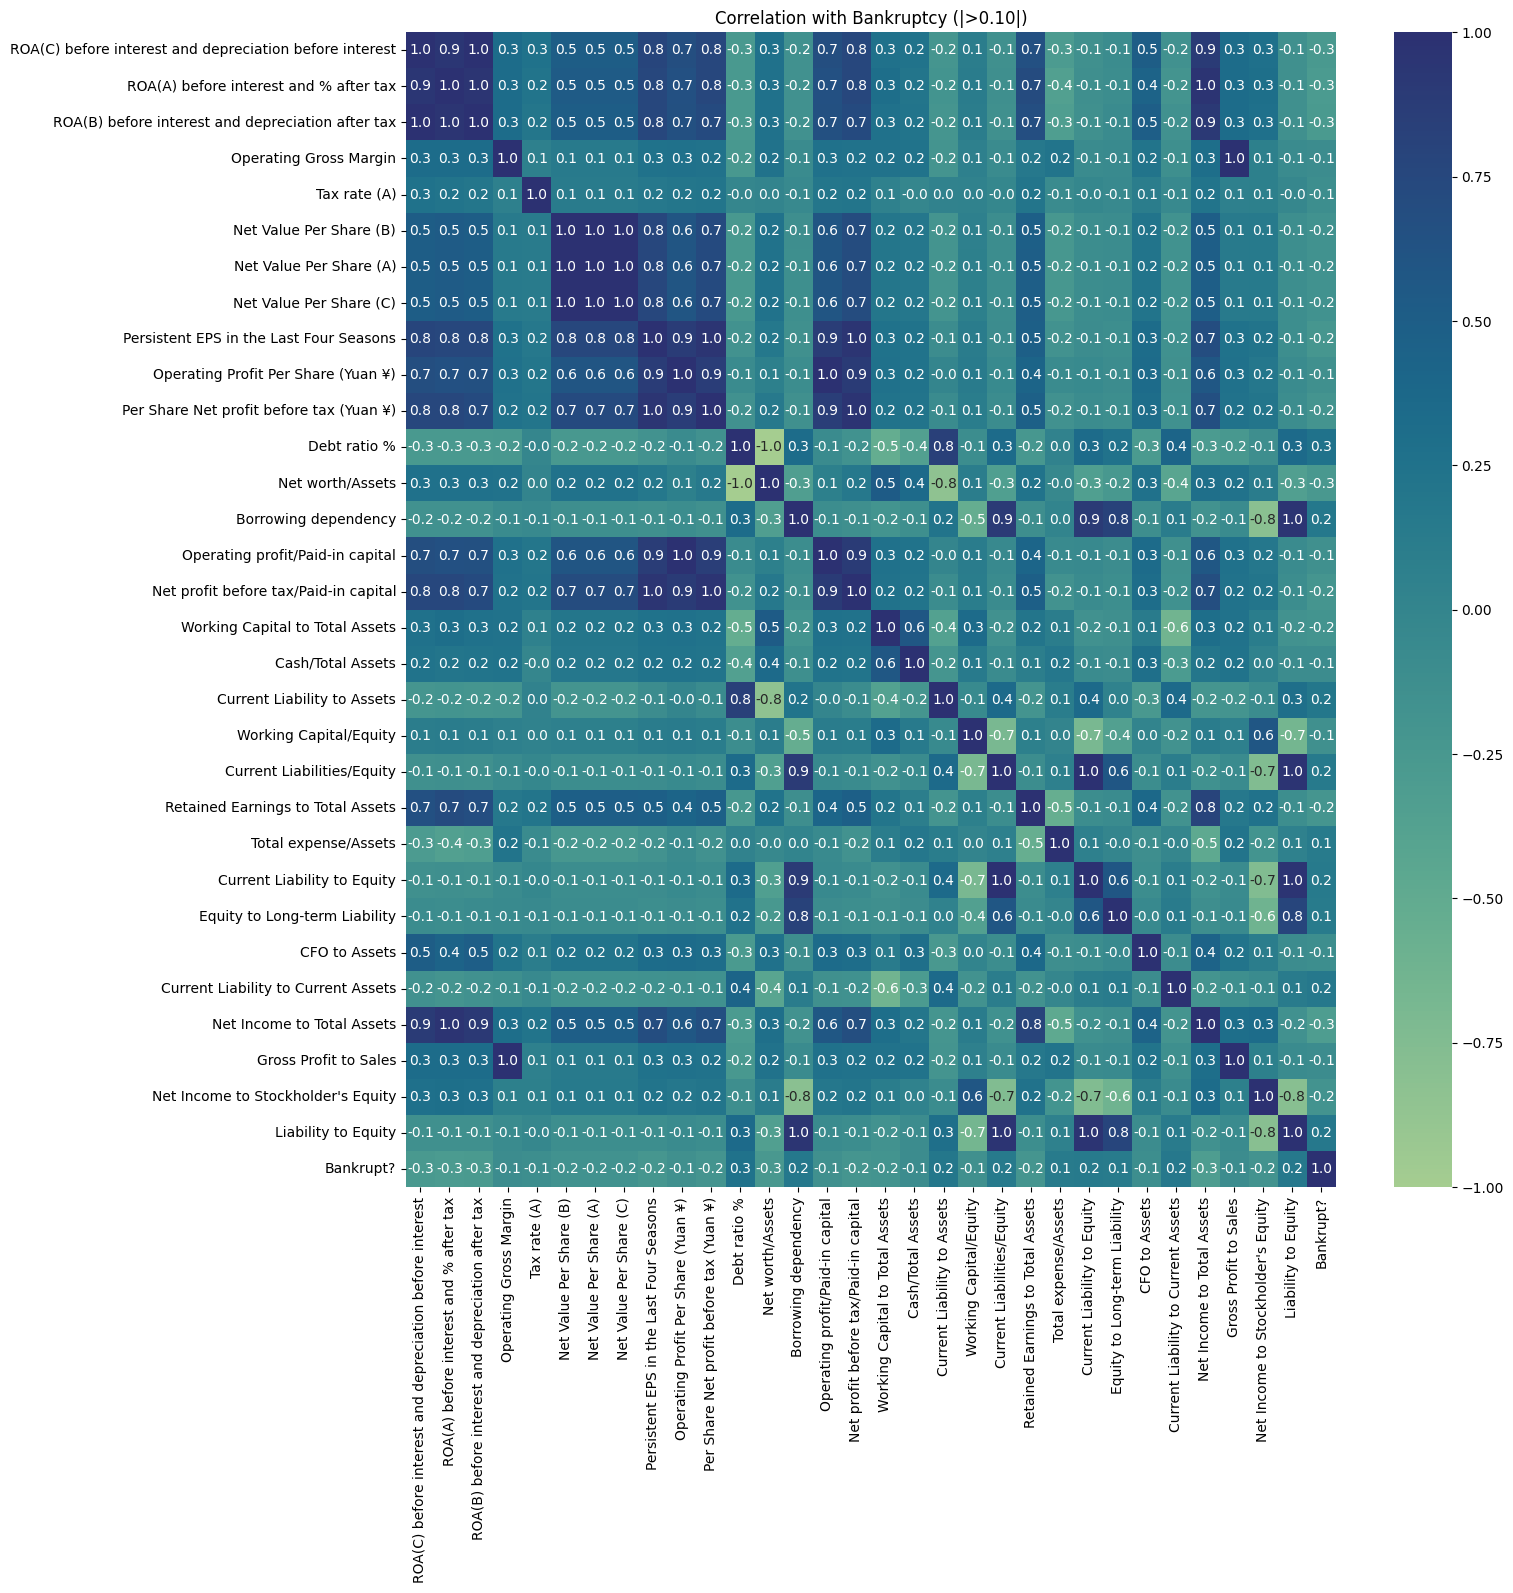

In [ ]:
# Select above mentioned features to find correlation between each other
correlated_features = list(temp_corr[(temp_corr["Bankrupt?"] > 0.10)].index)+["Bankrupt?"]
corr_test = company_df[correlated_features]

plt.figure(figsize=(15, 15))
corr = corr_test.corr()

sns.heatmap(corr,cmap="crest",annot=True, fmt=".1f")
plt.title("Correlation with Bankruptcy (|>0.10|)")
plt.show()

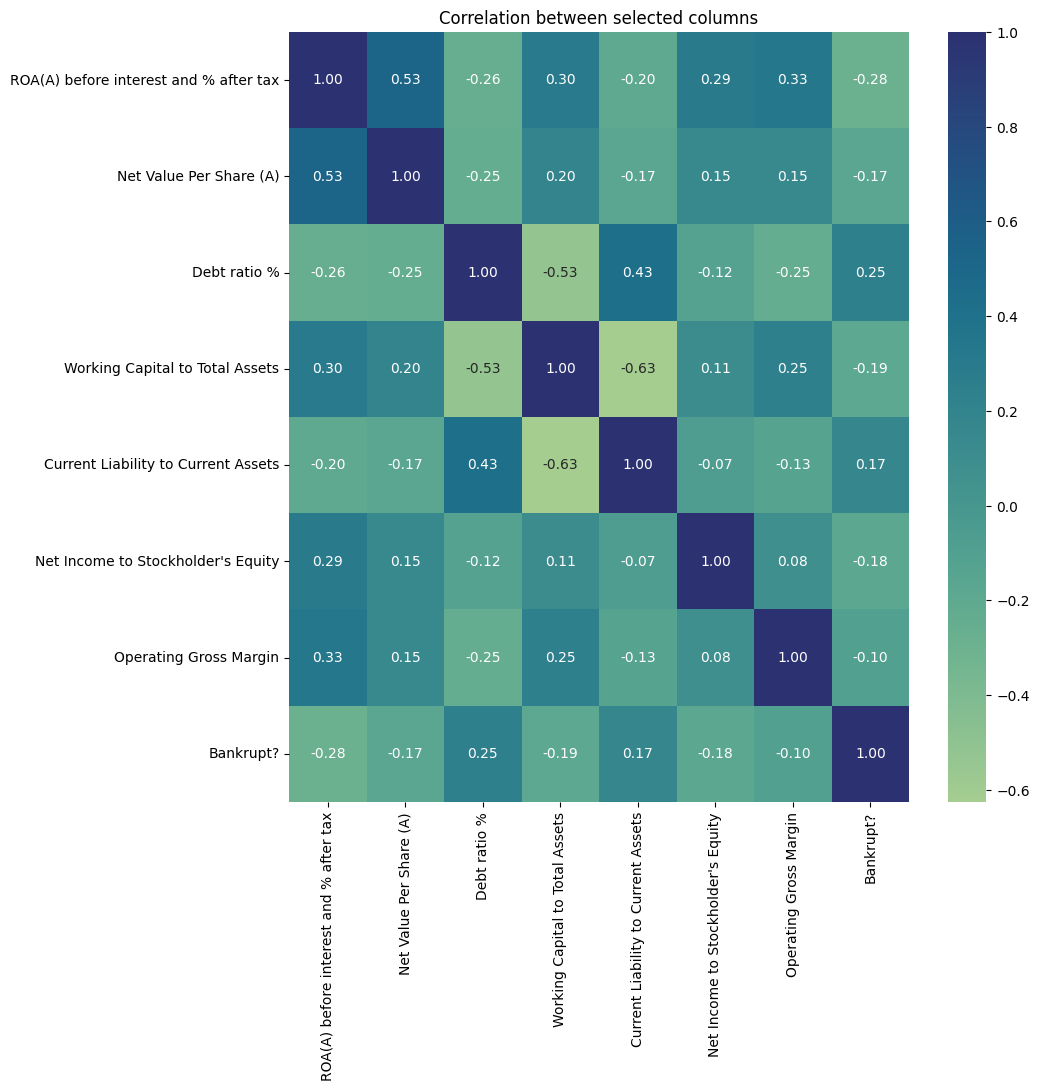

In [ ]:
# Observations :

# Lets remove columns with correlation with other columns = 1.0, which means both the columns convey same information

# Columns selected based on Linear relationship
selected_columns_set_linear = [
 'ROA(A) before interest and % after tax',
 'Net Value Per Share (A)',
 'Debt ratio %',
 'Working Capital to Total Assets',
 'Current Liability to Current Assets',
 "Net Income to Stockholder's Equity",
 'Operating Gross Margin',
 'Bankrupt?']

plt.figure(figsize=(10, 10))
sns.heatmap(company_df[selected_columns_set_linear].corr(),cmap="crest",annot=True, fmt=".2f")
plt.title("Correlation between selected columns")
plt.show()

In [ ]:
# We selected columns based on linear relationship with our target variable. In the next step we will use Mutual information to select columns based on Non linear relationship

# Columns with Non-Linear relationship with Target variable

independent_variable = company_df.drop(['Bankrupt?'], axis=1)
target_variable = company_df[['Bankrupt?']]

importances = mutual_info_classif(independent_variable,pd.Series.ravel(target_variable))
importances = pd.Series(importances,independent_variable.columns[0:len(independent_variable.columns)])
importances = pd.DataFrame({'features':importances.index, 'importance':importances.values})

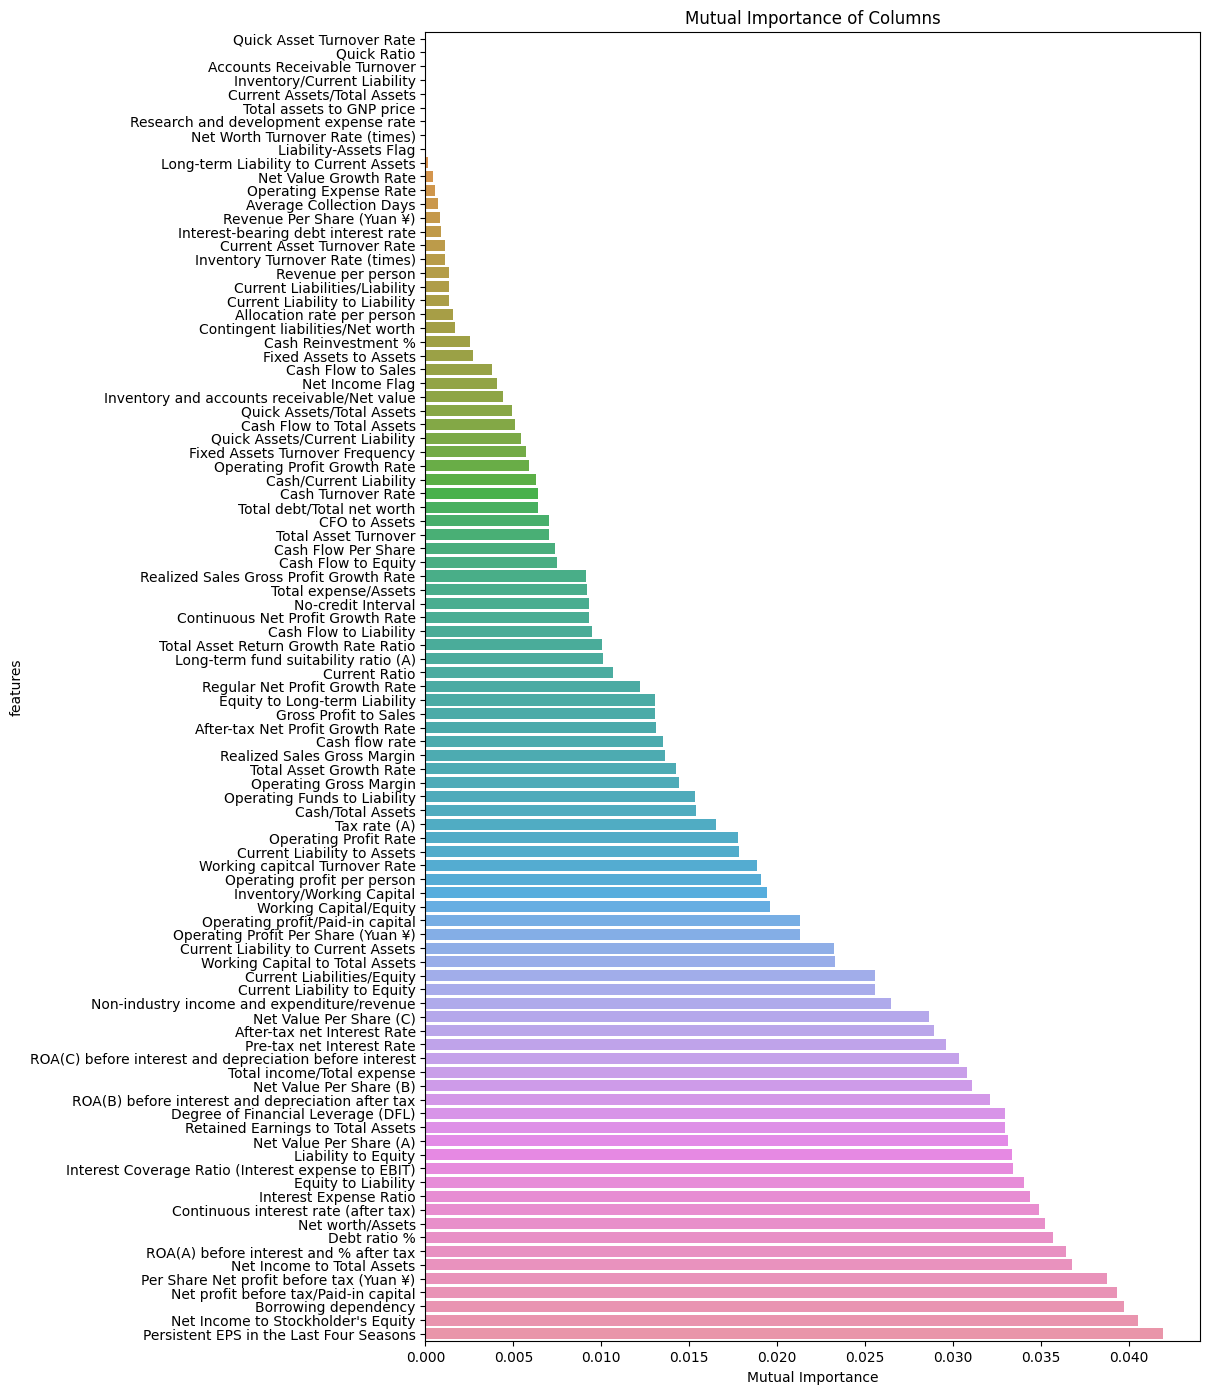

In [ ]:
# Mutual information
plt.figure(figsize=(10, 17))
sns.barplot(data = importances,y = "features", x = "importance",order=importances.sort_values('importance').features)
plt.xlabel("Mutual Importance")
plt.title("Mutual Importance of Columns")
plt.show()

In [ ]:
# Lets select top 10 columns for EDA and Modelling
selected_columns_set_non_linear = np.array(importances.nlargest(5,'importance').features)

In [ ]:
selected_columns = [*selected_columns_set_linear , *selected_columns_set_non_linear]
selected_columns = np.unique(selected_columns)

In [ ]:
# Exploratory data analysis

bankruptcy_df = company_df[selected_columns]
bankruptcy_df.head()

,Bankrupt?,Borrowing dependency,Current Liability to Current Assets,Debt ratio %,Net Income to Stockholder's Equity,Net Value Per Share (A),Net profit before tax/Paid-in capital,Operating Gross Margin,Per Share Net profit before tax (Yuan ¥),Persistent EPS in the Last Four Seasons,ROA(A) before interest and % after tax,Working Capital to Total Assets
0,1,0.390284,0.118250,0.207576,0.827890,0.147950,0.137757,0.601457,0.138736,0.169141,0.424389,0.672775
1,1,0.376760,0.047775,0.171176,0.839969,0.182251,0.168962,0.610235,0.169918,0.208944,0.538214,0.751111
2,1,0.379093,0.025346,0.207516,0.836774,0.177911,0.148036,0.601450,0.142803,0.180581,0.499019,0.829502
3,1,0.379743,0.067250,0.151465,0.834697,0.154187,0.147561,0.583541,0.148603,0.193722,0.451265,0.725754
4,1,0.375025,0.047725,0.106509,0.839973,0.167502,0.167461,0.598783,0.168412,0.212537,0.538432,0.751822


In [ ]:
bankruptcy_df.describe()

,Bankrupt?,Borrowing dependency,Current Liability to Current Assets,Debt ratio %,Net Income to Stockholder's Equity,Net Value Per Share (A),Net profit before tax/Paid-in capital,Operating Gross Margin,Per Share Net profit before tax (Yuan ¥),Persistent EPS in the Last Four Seasons,ROA(A) before interest and % after tax,Working Capital to Total Assets
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.374654,0.031506,0.113177,0.840402,0.190633,0.182715,0.607948,0.184361,0.228813,0.558625,0.814125
std,0.176710,0.016286,0.030845,0.053920,0.014523,0.033474,0.030785,0.016934,0.033180,0.033263,0.065620,0.059054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.370168,0.018034,0.072891,0.840115,0.173613,0.169376,0.600445,0.170370,0.214711,0.535543,0.774309
50%,0.000000,0.372624,0.027597,0.111407,0.841179,0.184400,0.178456,0.605997,0.179709,0.224544,0.559802,0.810275
75%,0.000000,0.376271,0.038375,0.148804,0.842357,0.199570,0.191607,0.613914,0.193493,0.238820,0.589157,0.850383
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Observations : All the columns are normalized, when we train our model we directly use the data without any normalization
#create_report(bankruptcy_df)

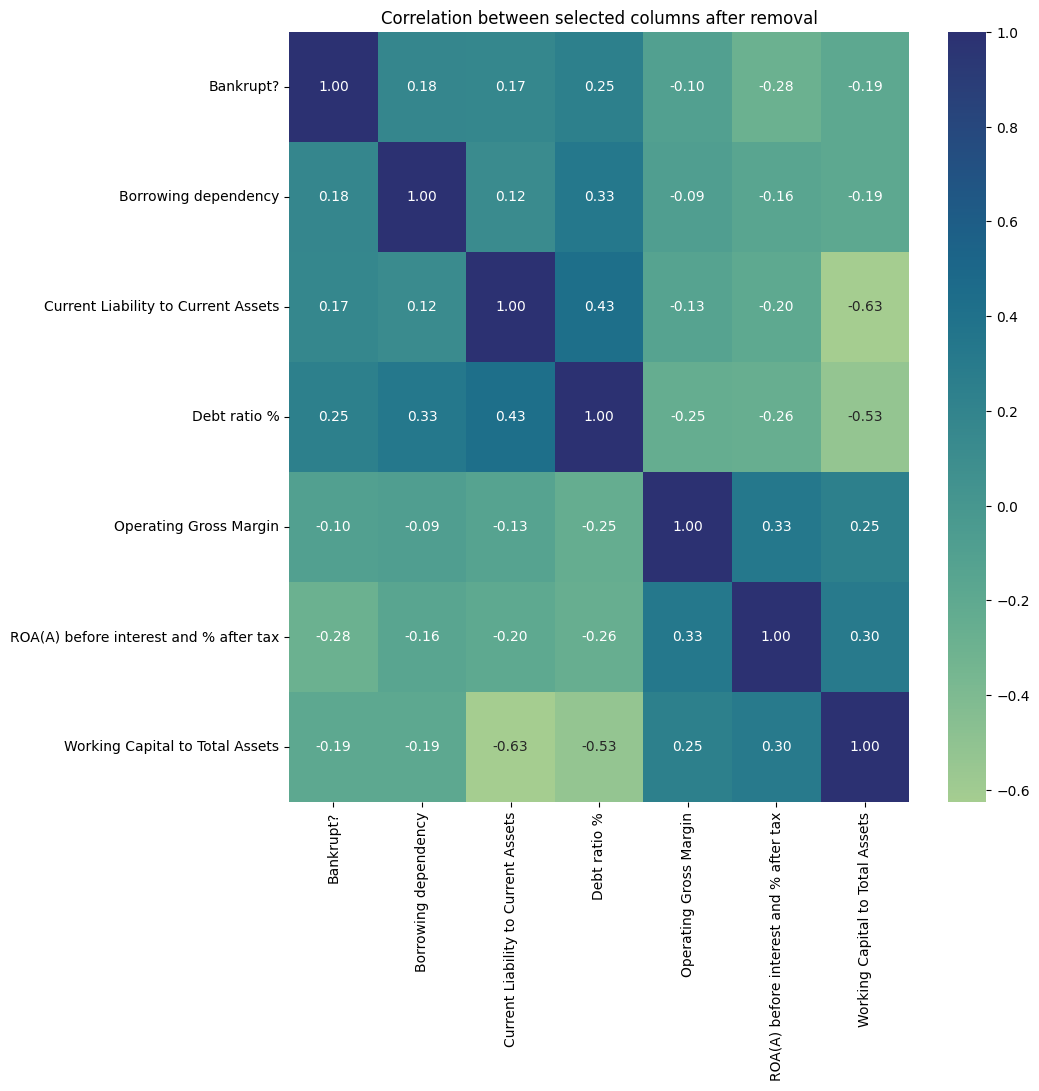

In [ ]:
#All the columns which are selected using linear and non linear relationships are Continous variables
#There is a high correlation (|>0.7|) between columns, lets remove following columns :
#In the upcoming section, lets remove the highly correlated columns and see the distribution of data based Bankruptcy

cols_to_remove = [
    'Net Value Per Share (A)',
    'Net profit before tax/Paid-in capital',
    'Net Income to Stockholder\'s Equity',
    'Persistent EPS in the Last Four Seasons',
    'Per Share Net profit before tax (Yuan ¥)'
]

# Removing highly correlated columns
selected_columns_1 =[x for x in selected_columns if x not in cols_to_remove]
bankruptcy_df = bankruptcy_df[selected_columns_1]

plt.figure(figsize=(10, 10))
sns.heatmap(bankruptcy_df[selected_columns_1].corr(),cmap="crest",annot=True, fmt=".2f")
plt.title("Correlation between selected columns after removal")
plt.show()

<h3><center>Pair plot - All selected features<center/></h3><br/>

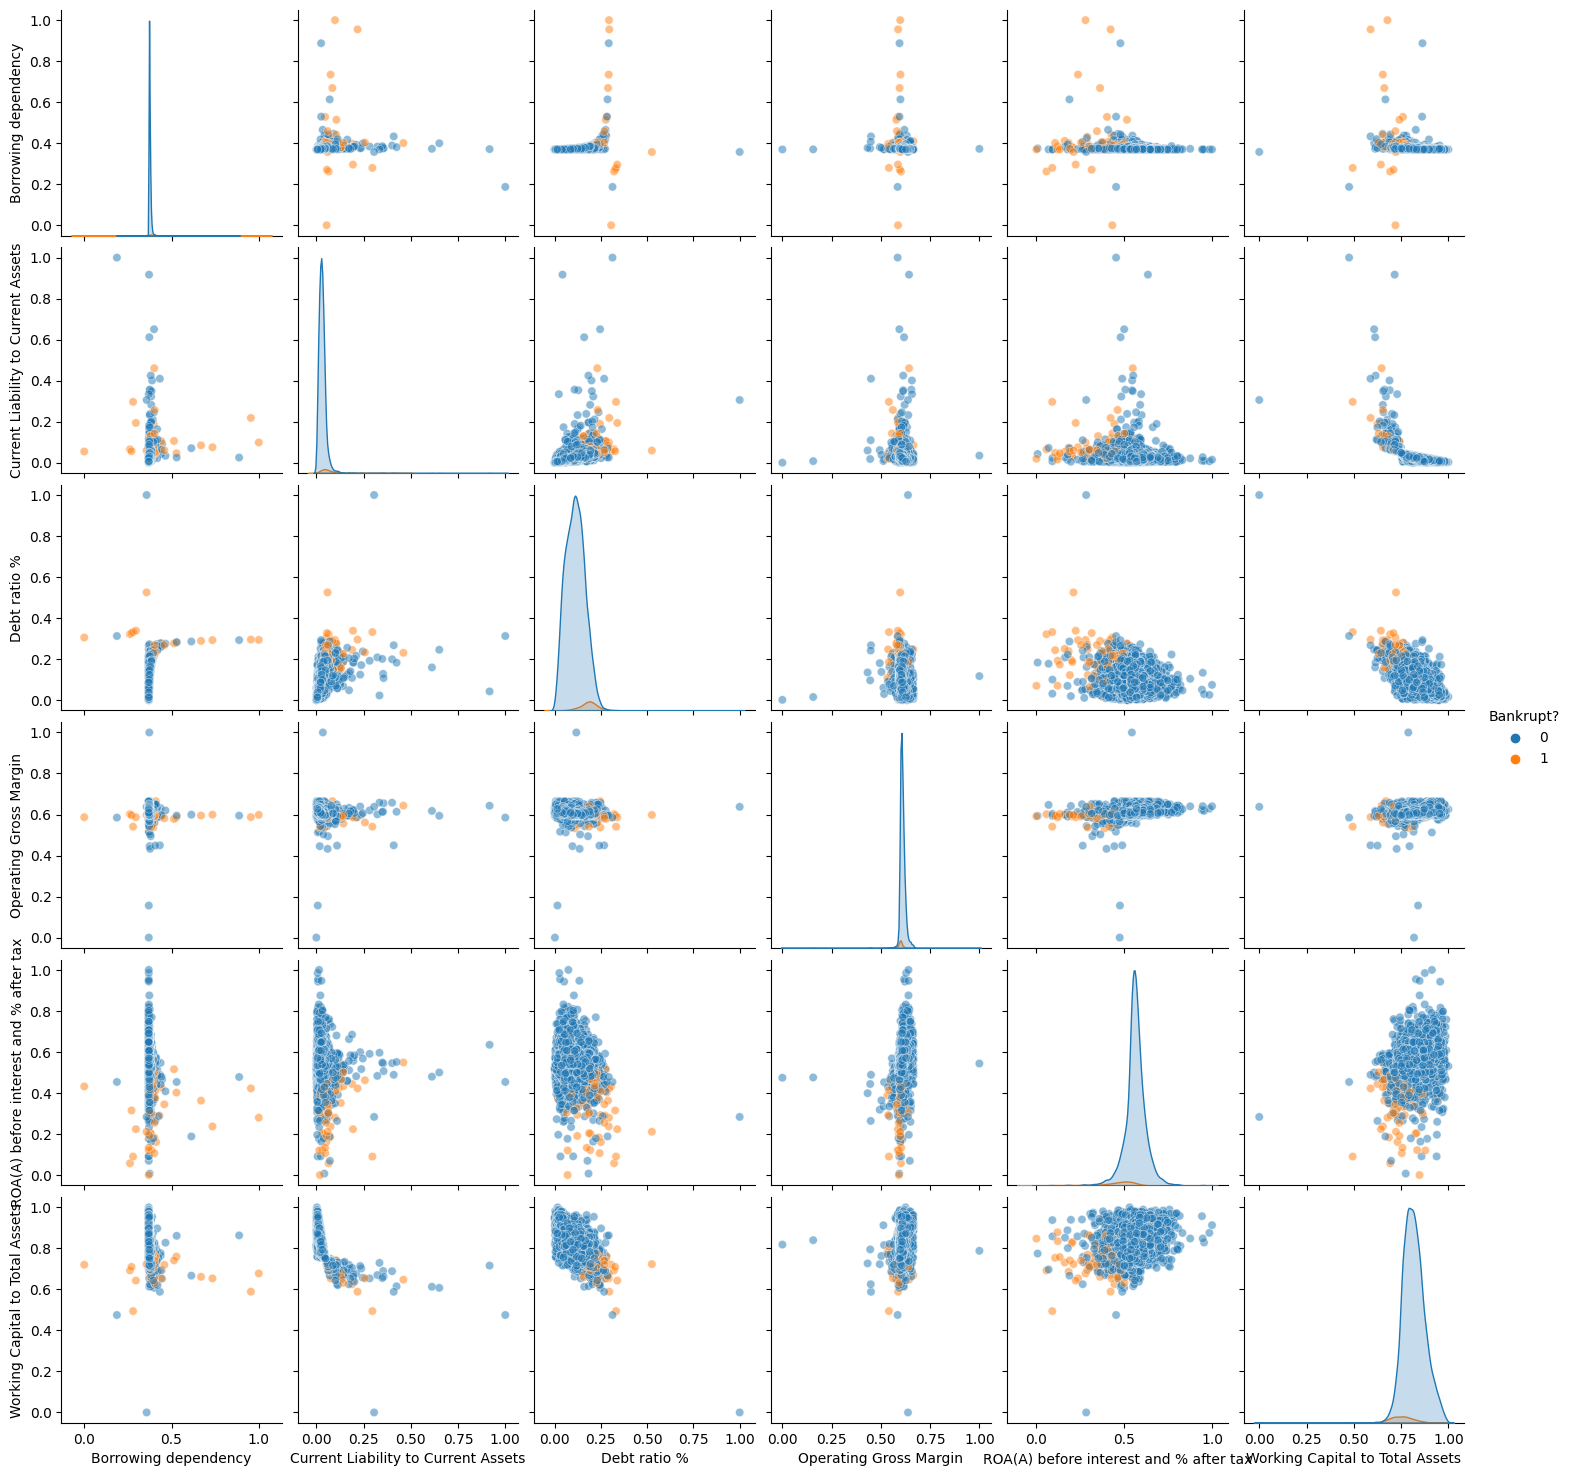

In [ ]:
# Scatter plot - Relationship between features with Bankruptcy hue
display(Markdown("<h3><center>Pair plot - All selected features<center/></h3><br/>"))
sns.pairplot(bankruptcy_df, hue='Bankrupt?',plot_kws={'alpha': 0.5})
plt.show()

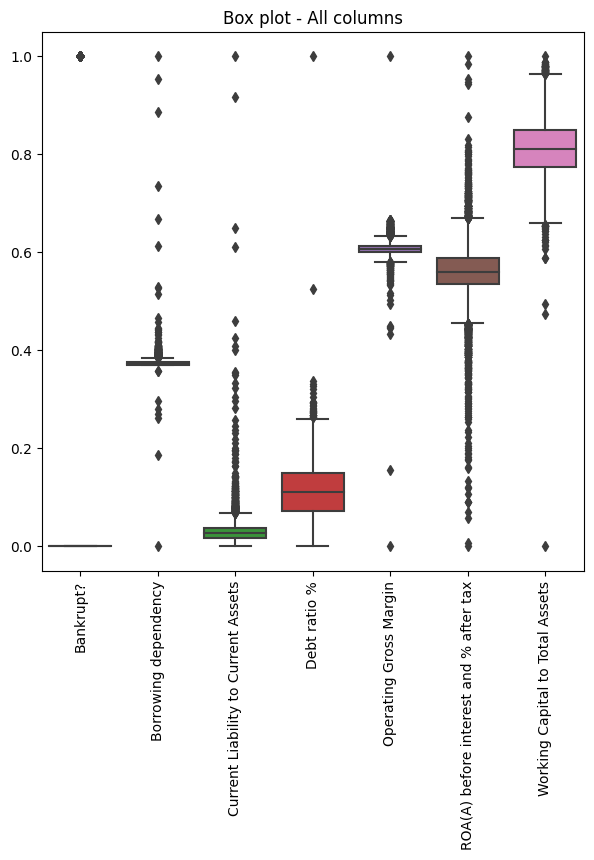

In [ ]:
# Box plot
plt.figure(figsize=(7, 7))
sns.boxplot(data=bankruptcy_df)
plt.xticks(rotation=90)
plt.title("Box plot - All columns")
plt.show()

In [ ]:
#Fixing Imbalance dataset
# In the categorical data distribution analysis, we came to know that company which are
# bankrupted are very less compared to non bankrupt companies. Our dataset is a imbalanced dataset.


# Distribution of Target variable
class_dist = pd.DataFrame(bankruptcy_df['Bankrupt?'].value_counts())
class_dist['Bankrupt? %'] = round((class_dist['Bankrupt?']/sum(class_dist['Bankrupt?']))*100,2)
class_dist['Bankrupt? %'] = class_dist['Bankrupt? %'].apply(str)
class_dist['Bankrupt? %'] = class_dist['Bankrupt? %'] +"%"

print("Bankruptcy distribution :\n")
print(class_dist)

Bankruptcy distribution :

   Bankrupt? Bankrupt? %
0       6599      96.77%
1        220       3.23%


In [ ]:
# Lets split features and target variable into X and y
X = bankruptcy_df.drop(['Bankrupt?'],axis=1)
y = bankruptcy_df['Bankrupt?']

In [ ]:
# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

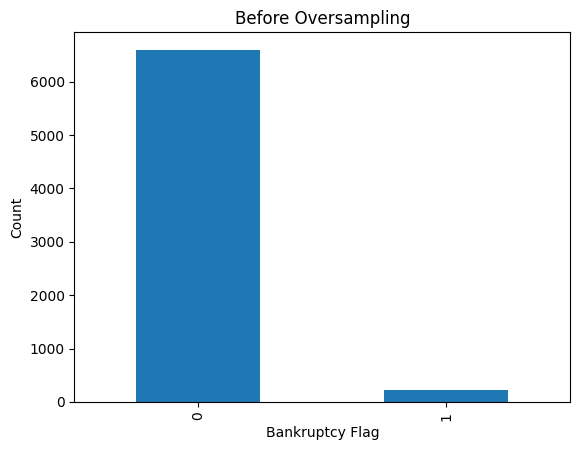

In [ ]:
# Before Oversampling using SMOTE
bankruptcy_df['Bankrupt?'].value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("Before Oversampling")
plt.show()

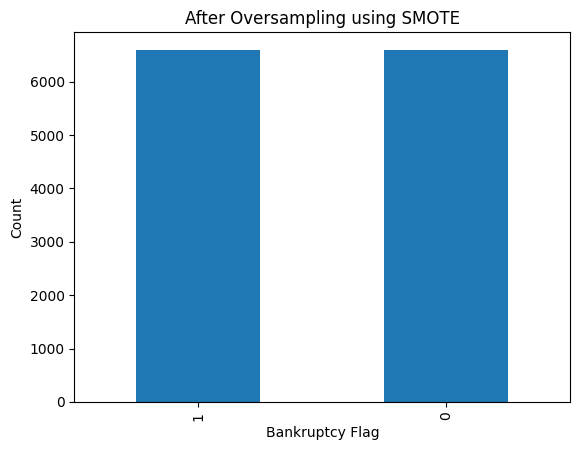

In [ ]:
# After Oversampling using SMOTE
y_res.value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

<h3><center>Pair plot - All selected features after resampling<center/></h3><br/>

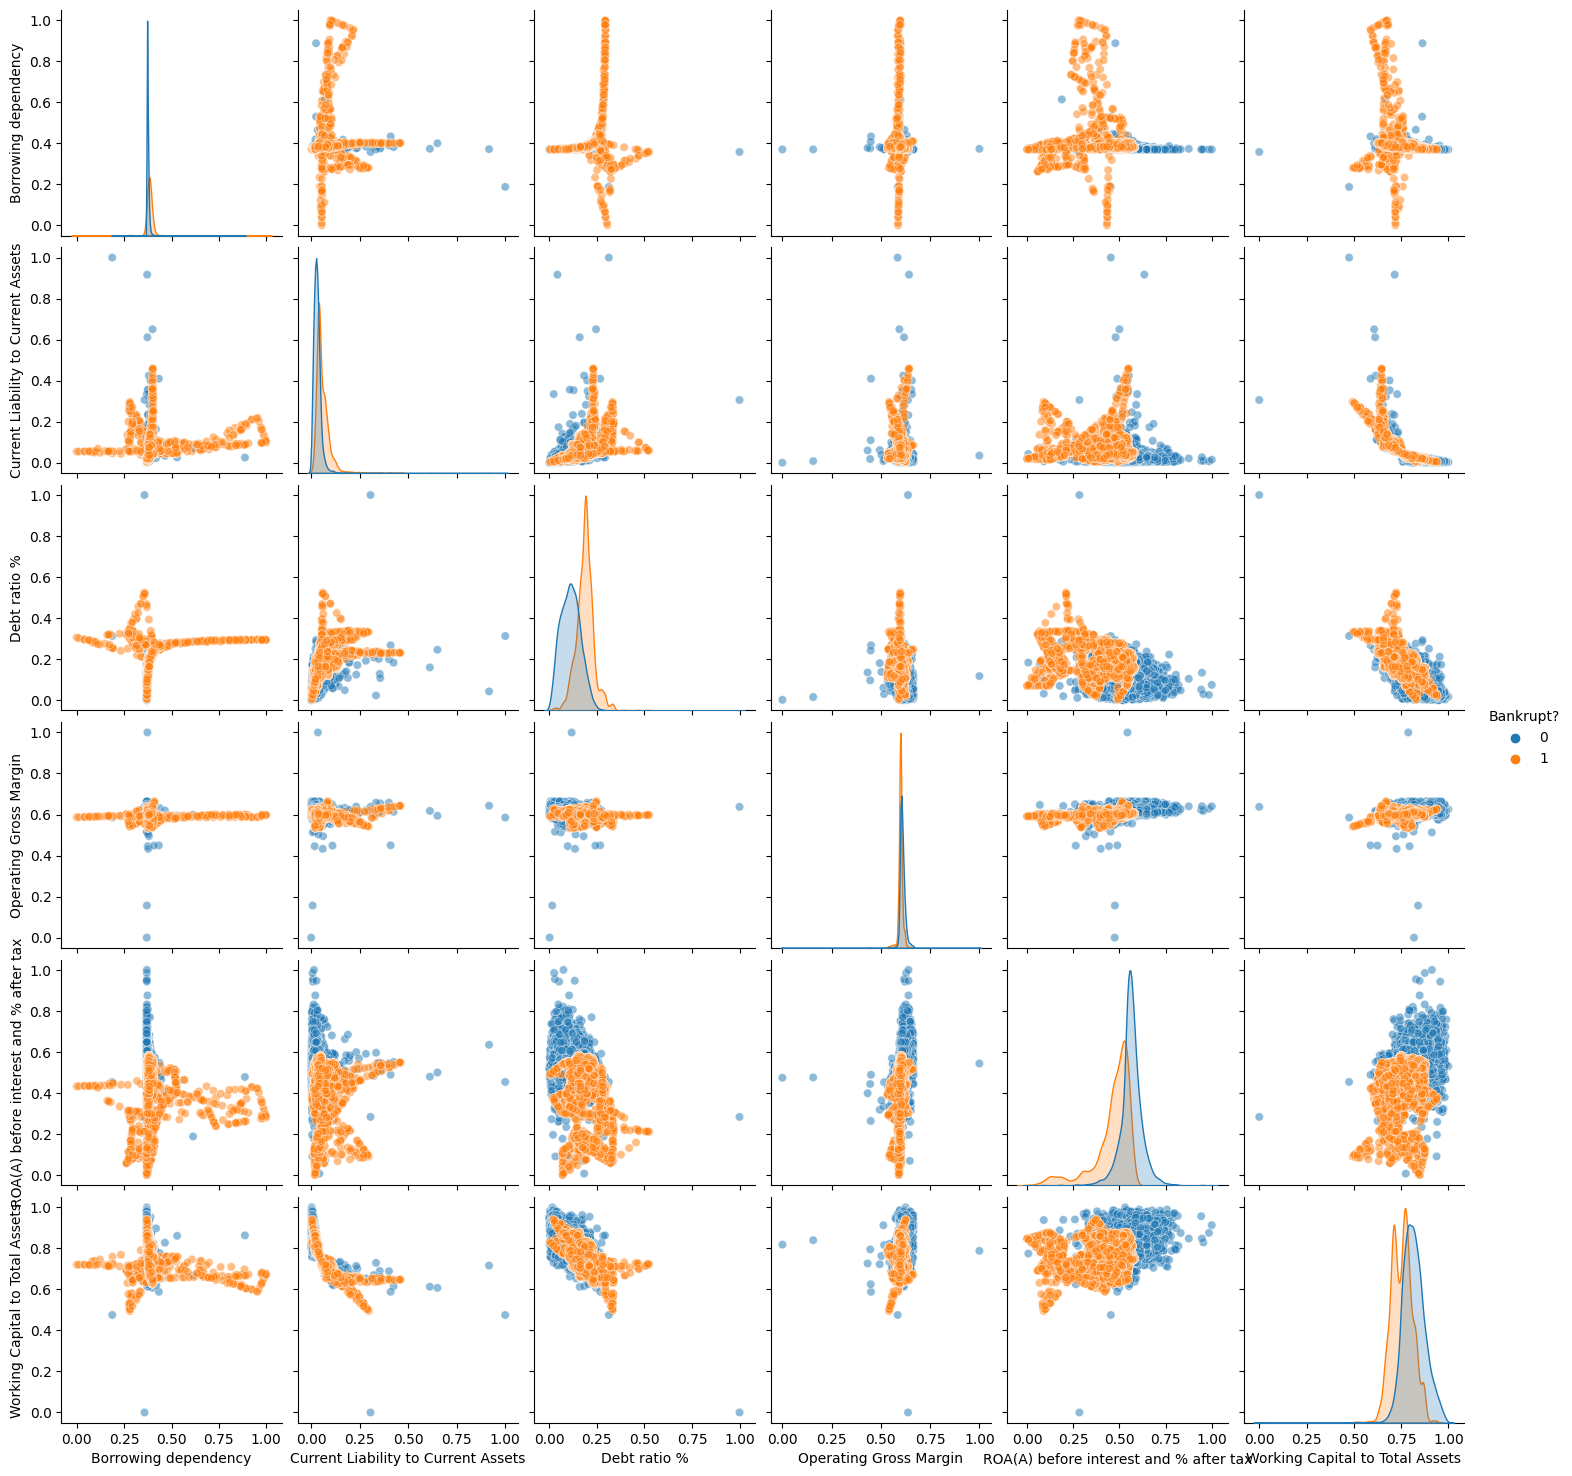

In [ ]:
bankruptcy_resampled_df = X_res.copy()
bankruptcy_resampled_df['Bankrupt?'] = y_res.copy()

# Scatter plot - Relationship between features with Bankruptcy hue after resampling
display(Markdown("<h3><center>Pair plot - All selected features after resampling<center/></h3><br/>"))
sns.pairplot(bankruptcy_resampled_df, hue='Bankrupt?',plot_kws={'alpha': 0.5})
plt.show()

In [ ]:
# Modelling

# Split resampled data set to train and test samples
# 0.30 means 30 percent data will be used
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.30, random_state=42,stratify=y_res)

In [ ]:
# Training following baseline models with default parameters

# Logistic regression
# SVM
# Decision tree
# Random forest
# Gaussian Naive Bayes
# K-Nearest Neighbors

In [ ]:
# Creating base models
log_reg_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42,probability=True)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gaussian_nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

In [ ]:
# Hyperparameters of models




log_reg_params_L1 = {
    "solvers" : ['liblinear','saga'],
    "penalty" : ['l1'],
    "C" : [0.01,0.1,1.0,100,10]
}

log_reg_params_L2 = {
    "solvers" : ['newton-cg','liblinear','newton-cholesky','sag','saga'],
    "penalty" : ['l2'],
    "C" : [0.01,0.1,1.0,100,10]
}



svm_params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.01,0.1,1.0,100,10],
    'gamma': [1, 0.1, 0.01, 0.001]
}



decision_tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt']
}



random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


guassian_nb_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}



knn_params = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance']
}


<h1>Performance of baseline models</h1><br/>

<h2> 1. Logistic regression </h2>

<h3> Classification report : </h3>

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1980
           1       0.86      0.86      0.86      1980

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



<h3> Confusion matrix : </h3>

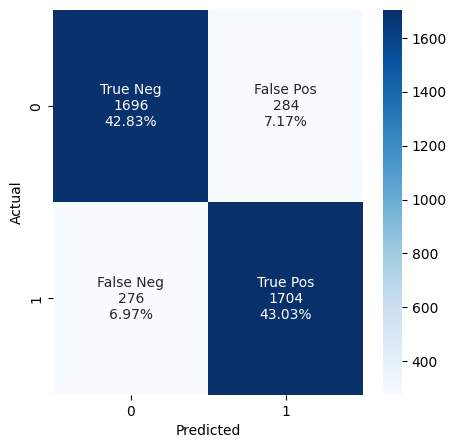

<h3> AUC-ROC Curve : </h3>

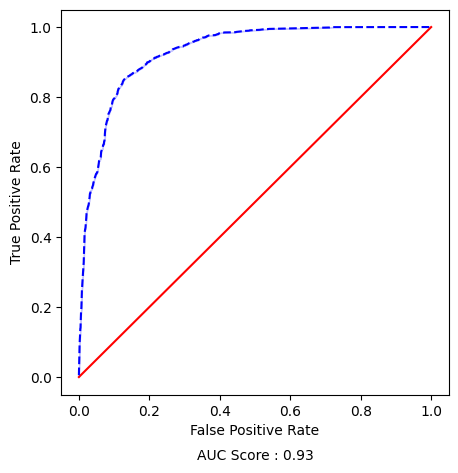

<br/>

<h2> 2. SVM </h2>

<h3> Classification report : </h3>

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1980
           1       0.84      0.89      0.86      1980

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



<h3> Confusion matrix : </h3>

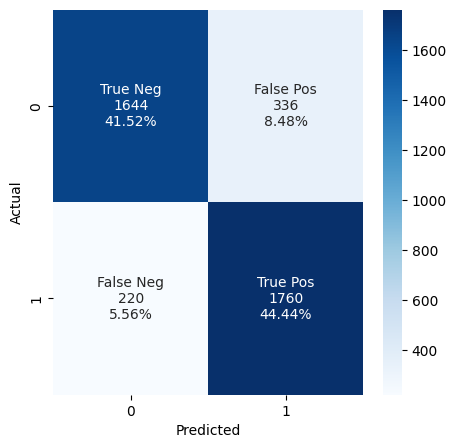

<h3> AUC-ROC Curve : </h3>

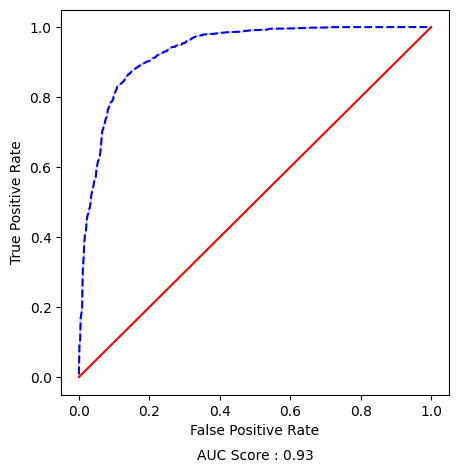

<br/>

<h2> 3. Decision Tree </h2>

<h3> Classification report : </h3>

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1980
           1       0.92      0.94      0.93      1980

    accuracy                           0.93      3960
   macro avg       0.93      0.93      0.93      3960
weighted avg       0.93      0.93      0.93      3960



<h3> Confusion matrix : </h3>

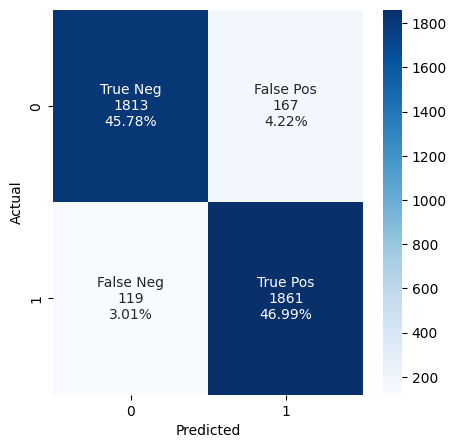

<h3> AUC-ROC Curve : </h3>

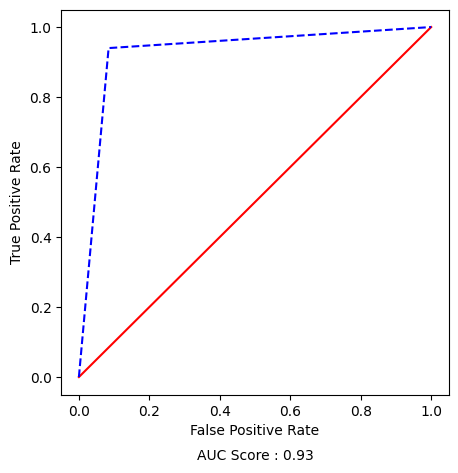

<br/>

<h2> 4. Random Forest </h2>

<h3> Classification report : </h3>

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1980
           1       0.94      0.98      0.96      1980

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960



<h3> Confusion matrix : </h3>

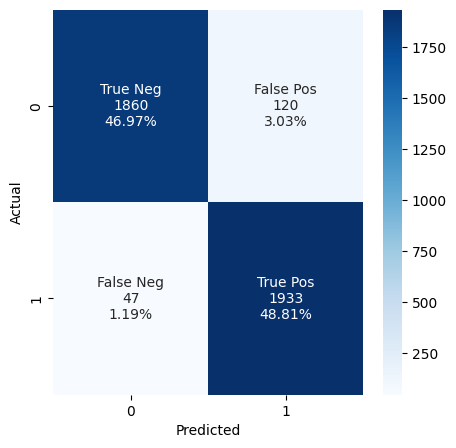

<h3> AUC-ROC Curve : </h3>

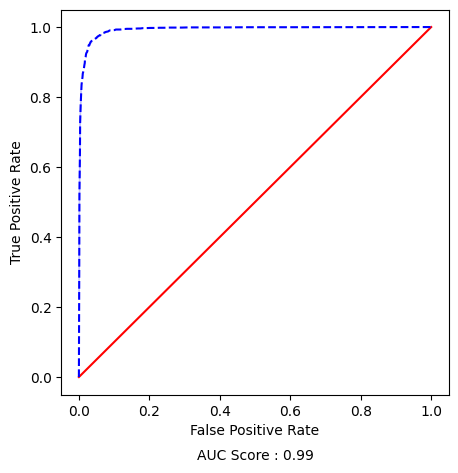

<br/>

<h2> 5. Gaussian Naive Bayes </h2>

<h3> Classification report : </h3>

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1980
           1       0.91      0.66      0.76      1980

    accuracy                           0.80      3960
   macro avg       0.82      0.80      0.79      3960
weighted avg       0.82      0.80      0.79      3960



<h3> Confusion matrix : </h3>

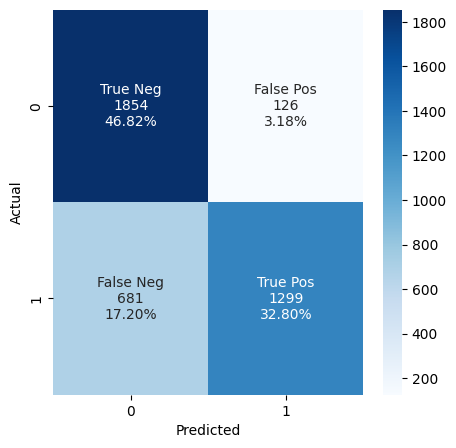

<h3> AUC-ROC Curve : </h3>

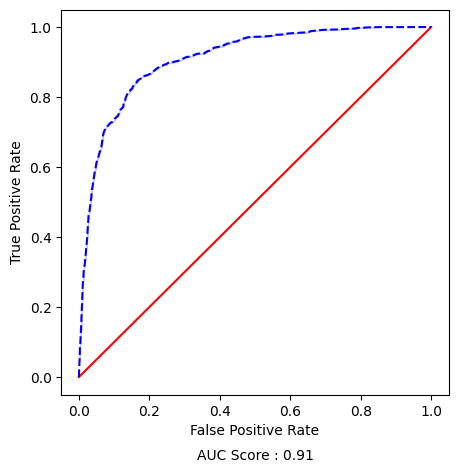

<br/>

<h2> 6. K-Nearest Neighbours </h2>

<h3> Classification report : </h3>

              precision    recall  f1-score   support

           0       0.99      0.89      0.93      1980
           1       0.90      0.99      0.94      1980

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



<h3> Confusion matrix : </h3>

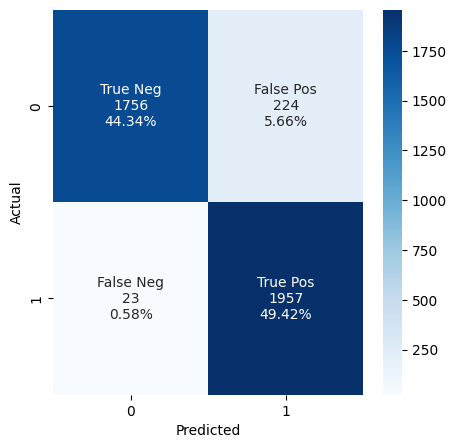

<h3> AUC-ROC Curve : </h3>

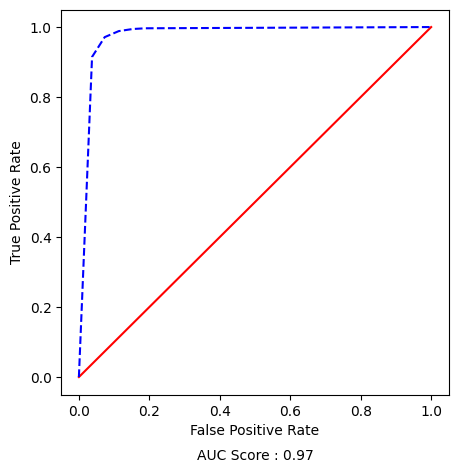

<br/>

In [ ]:
# Training baseline models
log_reg_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
decision_tree_model.fit(X_train,y_train)
random_forest_model.fit(X_train,y_train)
gaussian_nb_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)

# Performance of baseline models
display(Markdown("<h1>Performance of baseline models</h1><br/>"))
print_model_performance("1. Logistic regression",log_reg_model,X_test,y_test)
logisticaccuracy=0.86
print_model_performance("2. SVM",svm_model,X_test,y_test)
svmaccuracy=0.86
print_model_performance("3. Decision Tree",decision_tree_model,X_test,y_test)
decisiontreeaccuracy=0.93
print_model_performance("4. Random Forest",random_forest_model,X_test,y_test)
randomforestaccuracy=0.96
print_model_performance("5. Gaussian Naive Bayes",gaussian_nb_model,X_test,y_test)
gnbaccuracy=0.80
print_model_performance("6. K-Nearest Neighbours",knn_model,X_test,y_test)
knearestneighboraccuracy=0.94

In [ ]:
#stacking algorithm

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gnb', GaussianNB()),
    ('dtc',DecisionTreeClassifier()),
    ('svvvc',SVC()),
    ('lreg',LogisticRegression())

]

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=11
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9623737373737373

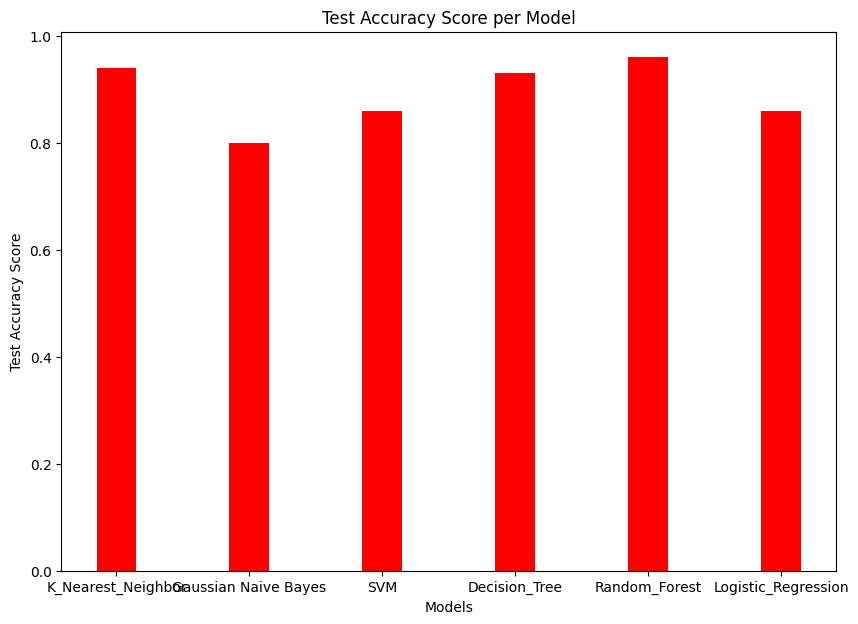

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
fg = {'K_Nearest_Neighbor':knearestneighboraccuracy,'Gaussian Naive Bayes':gnbaccuracy,'SVM':svmaccuracy,'Decision_Tree':decisiontreeaccuracy, 'Random_Forest':randomforestaccuracy, 'Logistic_Regression':logisticaccuracy}
models = list(fg.keys())
tascore = list(fg.values())

fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(models, tascore, color ='red',
        width = 0.3)

plt.xlabel("Models")
plt.ylabel("Test Accuracy Score")
plt.title("Test Accuracy Score per Model")
plt.show()